In [16]:
# import libraries
import pandas as pd
import numpy as np

In [17]:
# load dataset
dataset = pd.read_csv("AB_NYC_2019.csv")

## Data Preparation

In [8]:
df = pd.DataFrame(dataset)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [39]:
# The size of the data frame
print("Number of rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of rows:  48895
Number of Columns:  16


In [9]:
# make all column headings uniform with lower case and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
# list all columns whose values are objects
strings = list(df.dtypes[df.dtypes == "object"].index)
strings

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [18]:
# make all object values lower case and replaces spaces with underscores
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [19]:
# nicely prepared Data Frame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0


## Exploratory Data Analysis

In [23]:
# check for some information about columns such as unique values, number of unique values per column e.t.c.
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[2539 2595 3647 3831 5022]
48895

name
['clean_&_quiet_apt_home_by_the_park' 'skylit_midtown_castle'
 'the_village_of_harlem....new_york_!' 'cozy_entire_floor_of_brownstone'
 'entire_apt:_spacious_studio/loft_by_central_park']
47486

host_id
[2787 2845 4632 4869 7192]
37457

host_name
['john' 'jennifer' 'elisabeth' 'lisaroxanne' 'laura']
11428

neighbourhood_group
['brooklyn' 'manhattan' 'queens' 'staten_island' 'bronx']
5

neighbourhood
['kensington' 'midtown' 'harlem' 'clinton_hill' 'east_harlem']
221

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718

room_type
['private_room' 'entire_home/apt' 'shared_room']
3

price
[149 225 150  89  80]
674

minimum_nights
[ 1  3 10 45  2]
109

number_of_reviews
[  9  45   0 270  74]
394

last_review
['2018-10-19' '2019-05-21' nan '2019-07-05' '2018-11-19']
1764

reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937

calculated_host_listings_count
[6 2 1 4 3]
47

avail

Visualize the Distribution of Price

In [24]:
# import Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='price', ylabel='Count'>

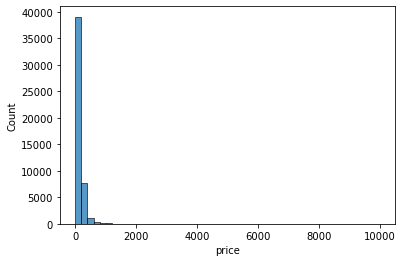

In [25]:
sns.histplot(df.price, bins=50)

Price distribution is a long tail

<AxesSubplot:xlabel='price', ylabel='Count'>

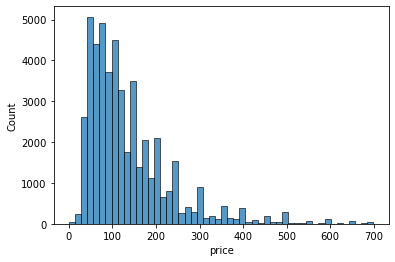

In [35]:
# histogram of prices less than 700
sns.histplot(df.price[df.price < 700], bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

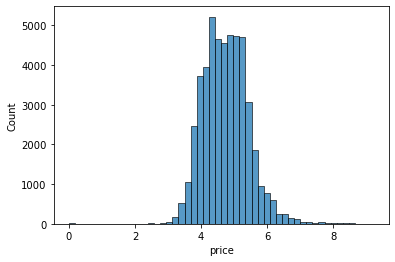

In [36]:
# applying logarithmic transformation on the price set to handle long tail distribution
price_logs = np.log1p(df.price)
sns.histplot(price_logs, bins=50)

Missing Values

In [37]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Features with missing values are <b> name, host_name, last review and review_per_month</b>

In [42]:
# median (50% percentile) for the variable "minimum_nights"
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

The media value of the variable "minimum_nights" is 3.0

## Setting up the Validation Framework

In [45]:
# check the length of the data frame
n = len(df)
# validation and test sets
n_val = int(n * 0.2)
n_test = int(n * 0.2)
# train set
n_train = n - n_val - n_test

In [46]:
# compare the size of the data frame and that of n_train, n_val and n_test combined
n, n_train + n_val + n_test

(48895, 48895)

During spliting, I used int to round the sets to the nearest whole number. I then subtracted both n_val and n_test from n to create n_train, this was to make sure that all sets when combined maintain the same size as that of the original set.

In [47]:
# check the number of rows per each set
n_train, n_val, n_test

(29337, 9779, 9779)

In [67]:
# assign the first 60% of the data to n_train
df_train = df.iloc[:n_train]
# assign the next 20% of the data to n_val
df_val = df.iloc[n_train:n_train+n_val]
# assign the remaining 20% of the data to n_test
df_test = df.iloc[n_train+n_val:]

In [68]:
# check the shapes of each set
print("Train set shape: ", len(df_train))
print("Validation set shape: ", len(df_val))
print("Test set shape: ", len(df_test))

Train set shape:  29337
Validation set shape:  9779
Test set shape:  9779


In [58]:
# create an index to arrange n
# the indes will be used to assign random values to the dataset
idx = np.arange(n)

In [59]:
# shuffle the index for efficiency to make sure that the model does not train from fixed values
np.random.seed(42)
np.random.shuffle(idx)

In [60]:
# test the index
idx[n_train:]

array([  743, 36546, 16439, ..., 38158,   860, 15795])

In [65]:
# Use the shuffled index to assign values to the datasets
# assign the first 60% of the data to n_train
df_train = df.iloc[idx[:n_train]]
# assign the next 20% of the data to n_val
df_val = df.iloc[idx[n_train:n_train+n_val]]
# assign the remaining 20% of the data to n_test
df_test = df.iloc[idx[n_train+n_val:]]

In [63]:
df_train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
743,269283,brooklyn:_a_huge_bedroom_+_good_vibes,1410714,antoinette,brooklyn,crown_heights,40.66431,-73.93216,private_room,50,3,26,2019-02-16,0.33,1,158
36546,29058736,spacious_basement_bedroom_in_duplex_w/_yard_ac...,142833006,cj,brooklyn,bushwick,40.70631,-73.92064,private_room,42,2,2,2019-01-21,0.26,1,0
16439,13192379,elegant_room_in_northern_manhattan,40439772,ezra,manhattan,washington_heights,40.85244,-73.93126,private_room,40,2,11,2019-04-18,0.29,2,16
37435,29704561,huge_designer_soho_loft_(elevator)_private_ter...,54377368,alexander,manhattan,lower_east_side,40.72100,-73.99218,entire_home/apt,350,2,5,2019-06-28,0.74,1,326
11400,8857546,comfy_rooms,45601111,dlb,queens,laurelton,40.66943,-73.74778,private_room,45,2,85,2019-05-26,1.99,5,333


In [66]:
# check the lengths of each set
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [69]:
# reset the index values to be in sequence with each other
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [70]:
# apply logarithmic transformation to the target variables in each set
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [71]:
# check the target variables arrays
y_train, y_val, y_test

(array([5.01063529, 5.420535  , 5.01727984, ..., 4.61512052, 4.11087386,
        5.86078622]),
 array([4.11087386, 3.76120012, 4.11087386, ..., 4.63472899, 4.39444915,
        5.96870756]),
 array([6.11146734, 5.29831737, 4.7095302 , ..., 4.75359019, 4.02535169,
        4.51085951]))

In [72]:
# remove the target variables to make sure that they are not accidentally used as X variables
del df_train["price"]
del df_val["price"]
del df_test["price"]

In [73]:
# check the lengths of target variables to make sure that they are consistent with those of X variables
len(y_train), len(y_val), len(y_test)

(29337, 9779, 9779)

## Linear Regression

In [76]:
# check the values of the 10'th row of the train set
df_train.iloc[10]

id                                                            5295
name                              beautiful_1br_on_upper_west_side
host_id                                                       7702
host_name                                                     lena
neighbourhood_group                                      manhattan
neighbourhood                                      upper_west_side
latitude                                                  40.80316
longitude                                                -73.96545
room_type                                          entire_home/apt
minimum_nights                                                   5
number_of_reviews                                               53
last_review                                             2019-06-22
reviews_per_month                                             0.43
calculated_host_listings_count                                   1
availability_365                                              

In [77]:
# The train linear regression function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

## Apartment Baseline Model

In [78]:
df_train.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [81]:
# extract features with numerical values from the data set
base = [
    'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365'
]

Among all the above <b>base features</b>, the only feature with null values is the <b>reviews_per_month</b> column

In [83]:
# assign those features to X variable
X_train = df_train[base].values

In [101]:
# check how many null features are there in reviews_per_month
df_train[base].reviews_per_month.isnull().sum()

4848

In [102]:
# calculate the mean of values of the feature reviews_per_month
df_train[base].reviews_per_month.mean()

1.0217775327698346

Filling null values in <b>reviews_per_month</b> using <b>zeros</b> and <b>mean</b> separately.

In [90]:
# fill null values with zeros
X_train_nzeros = df_train[base].fillna(0).values

In [103]:
# fill null values with mean
X_train_nmean = df_train[base].fillna(1.0217775327698346).values

In [104]:
# create the weights with X_train_nzeros
w0, w = train_linear_regression(X_train_nzeros, y_train)

In [108]:
# predictions
y_pred_nzeros = w0 + X_train_nzeros.dot(w)

<AxesSubplot:ylabel='Count'>

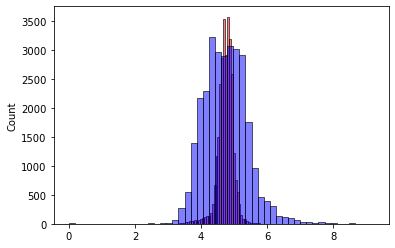

In [113]:
# histogram plot to compare the predictions and the real target values
sns.histplot(y_pred_nzeros, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)

In [105]:
# create weights with X_train_nmean
w0, w = train_linear_regression(X_train_nmean, y_train)

In [106]:
# predictions for null filled with mean
y_pred_nmean = w0 + X_train_nmean.dot(w)

<AxesSubplot:ylabel='Count'>

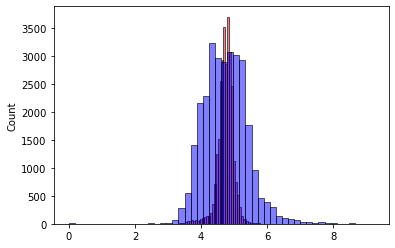

In [112]:
# histogram plot to compare the predictions of null filled with mean and the original target values
sns.histplot(y_pred_nmean, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)

The two histograms are almost the same, this means that filling null values in reviews_per_month with either zeros or the mean value in this dataset would potentially give the same result. However, this is not the best conclusion yet, <b> Root Mean Squared Error</b> below will give a better conclusion.

## Root Mean Squared Error

In [114]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    
    return np.sqrt(mse)

In [115]:
rmse(y_train, y_pred_nzeros)

0.6212191932876913

In [116]:
rmse(y_train, y_pred_nmean)

0.6210570043312085

Root Mean Square Error (RMSE) is fairy the same for both sets, that is, those whose missing values are filled with zeros and those that are filled with the mean value

## Validating the Model

In [117]:
# data subset used in the model
base = [
    'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365'
]
X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [118]:
# function to prepare X variables from the subset
def prepare_X(df):
    df_num = df[base]
    
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [120]:
# Use RMSE on the validation data
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.6643750660377807

<b>RMSE</b> on validation set is larger than on train set.

## Categorical Variables

These are features whose values are of string data type referred to as <b>objects</b>.

In [123]:
# check for columns with object dtype
strings = list(df.dtypes[df.dtypes == "object"].index)
strings

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [125]:
# all categorical variables
categorical_variables = ['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [136]:
# create a dictionary for all categorical variables and loop over top five values of each one of them
categories = {}
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [137]:
# Top five values of all categorical variables
categories

{'name': ['home_away_from_home',
  'private_room',
  'hillside_hotel',
  'new_york_multi-unit_building',
  'private_room_in_williamsburg'],
 'host_name': ['michael', 'david', 'sonder_(nyc)', 'john', 'alex'],
 'neighbourhood_group': ['manhattan',
  'brooklyn',
  'queens',
  'bronx',
  'staten_island'],
 'neighbourhood': ['williamsburg',
  'bedford-stuyvesant',
  'harlem',
  'bushwick',
  'upper_west_side'],
 'room_type': ['entire_home/apt', 'private_room', 'shared_room'],
 'last_review': ['2019-06-23',
  '2019-07-01',
  '2019-06-30',
  '2019-06-24',
  '2019-07-07']}

In [138]:
# customize the prepare_X function for all categorical variables
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    for c, values in categories.items():
        for v in values:
            df["%s_%s" %(c, v)] = (df[c] == v).astype("int")
            features.append("%s_%s" %(c, v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X